In [4]:
!wget https://www.dropbox.com/s/2qmedy70qmz76s2/cvppp_harmonic.t7 -O cvppp_harmonic.t7

--2019-04-10 10:42:44--  https://www.dropbox.com/s/2qmedy70qmz76s2/cvppp_harmonic.t7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2qmedy70qmz76s2/cvppp_harmonic.t7 [following]
--2019-04-10 10:42:44--  https://www.dropbox.com/s/raw/2qmedy70qmz76s2/cvppp_harmonic.t7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc844f63cdd4481da777b6148db4.dl.dropboxusercontent.com/cd/0/inline/AevYaxblgrdbVlu5jFkBoRqcLx14GkQTvnLYqT9wA9inQOGrDgY1al28gjVlDf13vfZ98ZPyaSUSdnqmskUwJGH_yvvmFCAR1nwnZ2vUjCt5Aw/file# [following]
--2019-04-10 10:42:45--  https://uc844f63cdd4481da777b6148db4.dl.dropboxusercontent.com/cd/0/inline/AevYaxblgrdbVlu5jFkBoRqcLx14GkQTvnLYqT9wA9inQOGrDgY1al28gjVlDf13vfZ98ZPyaSUSdnqmskUwJGH_yvvmFCAR1nwnZ2vUjCt5Aw/file
R

In [1]:
import torch 
from torchvision import transforms
from harmonic import cluster
from models import UNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.Resize(size=(448,448)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])])

sins = [[-24.22295570373535, 0.0, 0.4452361464500427],
 [-14.779047012329102, 0.0, 1.2561423778533936],
 [-16.399198532104492, 0.0, -0.3734317719936371],
 [18.362571716308594, 0.0, 0.7659217715263367],
 [-0.6603534817695618, 0.0, 0.24005144834518433],
 [-33.7341423034668, 0.0, -0.4350433051586151],
 [0.0, 4.286965370178223, 0.8109257817268372],
 [0.0, -19.908288955688477, 0.614355206489563],
 [0.0, 22.987812042236328, 0.28104516863822937],
 [0.0, 7.108828067779541, 0.4827950894832611],
 [0.0, 23.66850471496582, 0.21264752745628357],
 [0.0, -22.332250595092773, 1.0007625818252563]]


net = torch.nn.DataParallel(UNet(3, sins), [0]).to(device)
wdict = torch.load('cvppp_harmonic.t7')
for k in wdict.keys():
    if k.endswith('num_batches_tracked'):
        wdict.pop(k)
net.load_state_dict(wdict)
net.eval()
print("Model loaded")

Model loaded


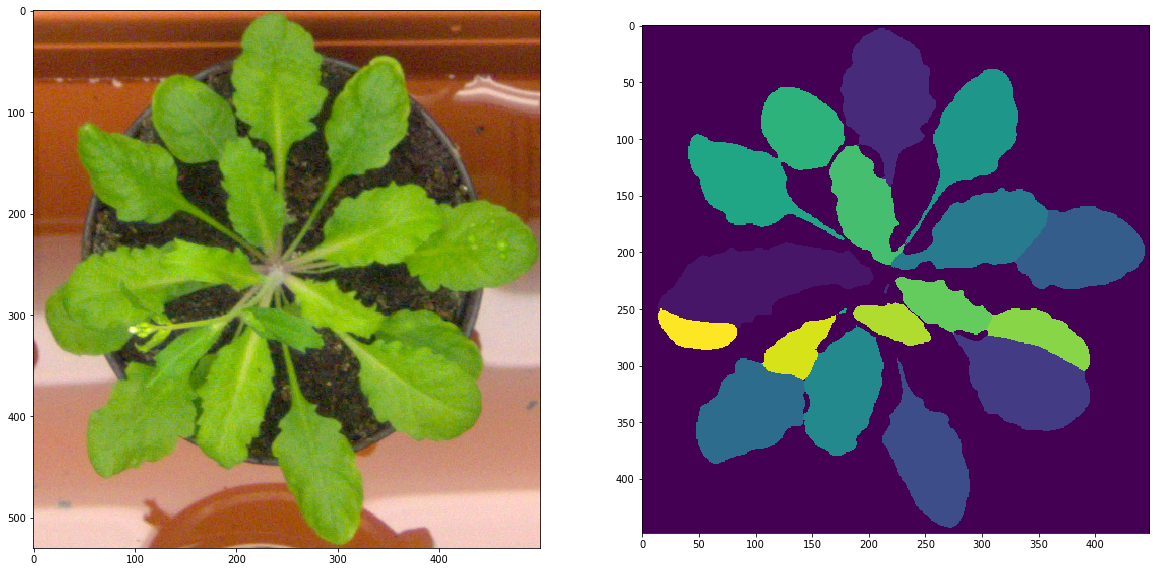

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("images/plant159_rgb.png").convert('RGB')
#estimate the embeddings
emb = net(transform(img).unsqueeze(0).to(device)).detach().cpu().numpy()
#cluster embeddings space
cc = cluster(emb[0],0.5,minimal_area=1000)

f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].imshow(img)
ax[1].imshow(cc)